## Főkomponens-analízis (PCA)

A [főkomponens-analízis](https://hu.wikipedia.org/wiki/F%C5%91komponens-anal%C3%ADzis) ([Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis#Singular_value_decomposition), PCA) az SVD közeli "rokona". 

Mi a PCA célja? Idézet a fenti cikkből:
"Működése felfogható úgy, mint az adat belső struktúrájának feltárása oly módon, hogy az a legjobban magyarázza az adathalmaz szóródását. Ha egy többváltozós adathalmaz egy nagy-dimenziós adattérben koordináták halmazaként ábrázolt, a főkomponens-analízis egy alacsonyabb dimenziójú képet szolgáltathat a felhasználó számára, a leginformatívabb nézőpontból nézve az objektum egy levetítése vagy „árnyéka” által. Ez az első néhány főkomponens felhasználásával történik úgy, hogy a transzformált adat dimenzióit lecsökkentjük."

A PCA ezért igen hasznos az adatok ábrázolásához, illetve a gépi tanulás különböző eljárásaihoz (regresszió, klaszterezés).

Legyen  $\mathbf{X}$ egy $p\times n$ méretű mátrix, amelynek sorai az egyes "jellegzetességek", oszopai pedig az egyes mérések". A "jellegzetességek" a mért változók vagy azok valamilyen kombinációi. 

Ha $\mathbf{X}$ soronként zérus átlagú, akkor állítsuk elő a mérések tapasztalati kovariancia mátrixát:

$$\mathbf{C}_{\mathbf{X}} = \frac{1}{n-1} \mathbf{X}\mathbf{X}^T$$

Állítsuk elő a $\mathbf{C}_{\mathbf{X}}$ mátrix sajátérték felbontását:

$$\mathbf{C}_{\mathbf{X}} =  \mathbf{P}\mathbf{\Lambda}\mathbf{P}^T.$$

Ebben az esetben az $\mathbf{Y}=\mathbf{P}\mathbf{X}$ mátrix adja az $\mathbf{X}$ mátrix ábrázolását a főkomponensek terében.

A PCA elvégezhető az $\mathbf{X}$ mátrix SVD felbontása segítségével is. Legyen az $\mathbf{X}$ mátrix SVD felbontása:

$$\mathbf{X}=\mathbf{U}\mathbf{S}\mathbf{V}^T.$$

Ekkor a $p\times p$ méretű $\mathbf{U}$ mátrix oszlopai tartalmazzák a $\mathbf{C}_{\mathbf{X}}$ kovariancia mátrix *főkomponenseit*.

A PCA egy olyan új koordinátarendszert próbál megtalálni, amelyben a variancia az első komponens szerint maximális. Kiderül, hogy ez a $\mathbf{C}$ kovariancia mátrix SVD (sajátérték) felbontása. Mivel mindegyik sajátvektorhoz egy sajátérték tartozik, ezért a sajátvektorok valamilyen részhalmazát kiválasztva (ezek jellemzően a legnagyobb sajátértékekhez tartozó sajátvektorok), lecsökkenthetjük a jellegzetességek vektorának dimenzióját erre az altérre történő vetítéssel.

Legyen $\mathbf{\hat{U}}$ az SVD bal oldali sajátvektoraiból álló $m\times k$ méretű mátrix, amelyben csak a legnagyobb $k$ sajátértékhez tartozó sajátvektorok oszlopait választottuk ki. Ekkor elő tudjuk állítani az $\mathbf{X}$ mátrix egy  $\mathbf{\hat{X}}$ $n\times k$ méretű közelítését:

$$\mathbf{\hat{X}}=\mathbf{\hat{U}}\mathbf{X}.$$


Először megírjuk a `PCA(X)` Python függvényt, amely elvégzi az `X` mátrix főkomponens-elemzését. Először levonjuk `X` soronkénti átlagait (mivel az `X` mátrix egyes sorai a változókra vonatkozó mérések) és kiszámoljuk a `Cx` kovariancia mátrixot. Ezután az `eig()` függvénnyel átlós alakra transzformáljuk.

In [1]:
import numpy as np
# PCA függvény
def PCA(X):
    """ főkomponens-elemzést végez (PCA)
        a (p,n) méretű A adatmátrixon
        X soraiban vannak az egyes változókra vonatkozó mérések, oszlopaiban az összes változó egy adott mérése

    Eredmények :  
      var :
        a főkomponensek varianciái
      Y   : 
        'X' ábrázolása a főkomponensek terében, Y = P.X
      P  : 
        'X' kovariancia mátrixa sajátértékeit tartalmazó vektor.
    """
    # soronként kivonjuk az átlagot
    M = (X - np.mean(X,axis=1,keepdims=True))
    # kiszámítjuk a kovariancia mátrix torzítatlan becslését
    Cx = 1.0/(X.shape[1]-1) * np.dot(M,M.T)
    # a kovariancia mátrix sajátértékeinek és sajátvektorainak a számítása    
    var, P = np.linalg.eig(Cx) # a sajátértékek nem mindig nagyság szerint rendezettek!
    Y = np.dot(P,M)   # az adatok vetítése az új térbe
    return var, Y, P

Kétváltozós minta adatrendszer. Az `X` mátrix sorai az egyes változók.

In [2]:
X = np.array([ [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9],
            [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1] ])
# PCA elemzés
var, Y, P = PCA(X)
print(var)
print(Y)
print(P)

[1.28402771 0.0490834 ]
[[-1.07495104e-01 -1.55202114e-03  4.63456244e-01  1.52193204e-01
  -7.31119496e-02  2.48633173e-01 -3.56701329e-01 -4.64172582e-02
  -1.77646297e-02 -2.61240329e-01]
 [ 8.39431238e-01 -1.78331085e+00  9.57814340e-01  2.62749365e-01
   1.68726247e+00  8.95757526e-01 -7.04568090e-02 -1.14457216e+00
  -4.38046137e-01 -1.20662898e+00]]
[[ 0.73517866 -0.6778734 ]
 [ 0.6778734   0.73517866]]


A két főkomponenst szaggatott vonallal ábrázoljuk, az eredeti adatokat kék pontokkal, az új adatokat piros csillaggal. Az első főkomponens az adatok legnagyobb változékonyságát mutatja és a második erre merőleges.

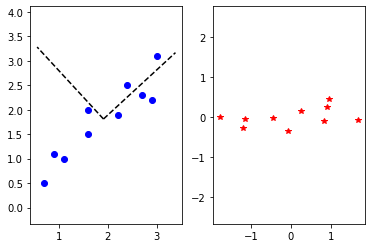

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(121)
# minden sajátvektor egy főkomponens irányát mutatja
m = np.mean(X,axis=1)
plt.plot([0, P[0,0]*2]+m[0], [0, P[1,0]*2]+m[1],'--k')
plt.plot([0, P[0,1]*2]+m[0], [0, P[1,1]*2]+m[1],'--k')
plt.plot(X[0,:],X[1,:],'ob') # a mérések
plt.axis('equal')
plt.subplot(122)
# a transzformált adatok
plt.plot(Y[1,:],Y[0,:],'*r')
plt.axis('equal')
plt.show()

Most számítsuk ki a főkomponenseket SVD segítségével. Ehhez elvégezzük az `M` mátrix SVD felbontását:

In [4]:
M = (X - np.mean(X,axis=1,keepdims=True))
print (M)
U,S,V = np.linalg.svd(M)
print (S**2/(M.shape[1]-1))
print (U)

[[ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]
 [ 0.69 -1.31  0.39  0.09  1.29  0.49  0.19 -0.81 -0.31 -0.71]]
[1.28402771 0.0490834 ]
[[-0.73517866 -0.6778734 ]
 [-0.6778734   0.73517866]]


Az `S` szinguláris értékek négyzete segítségével meghatározott varianciák ($1/(n-1)$-es szorzótól eltekintve) és az `U` mátrix oszlopaiban levő főkomponensek (az első komponens $-1$-es szorzójától eltekintve) megegyeznek a kovariancia mátrix sajátérték felbontásával kapott eredményekkel.

A következő példa egy négyváltozós adatrendszer PCA-ját mutatja be. Most az `X` mátrix oszlopai az egyes változók, ezért a mátrix transzponáltjára végezzük el a PCA-t.

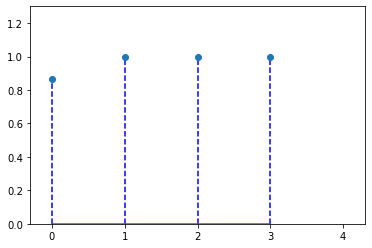

az X mátrix a főkomponensek terében:
[ 1.38594653e+01  2.14053472e+00 -2.35674713e-16  1.29088833e-16]
X rangja: 3


In [5]:
X = np.array([[-1, 1, 2, 2],
             [-2, 3, 1, 0],
             [ 4, 0, 3,-1]],dtype=np.double)

var, Y, P = PCA(X.T)
perc = np.cumsum(var)/np.sum(var)
plt.figure()
# a következő ábra azt mutatja, hogy az első
# két főkomponens gyakorlatilag már kiadja a teljes (1 = 100%) változékonyságot
plt.stem(range(len(perc)),perc,'--b')
plt.axis([-0.3,4.3,0,1.3])
plt.show()
print ('az X mátrix a főkomponensek terében:')
print (var.T) # csak az első két oszlop nem zérus
print ('X rangja: ', end='')
print (np.linalg.matrix_rank(X))